# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer. Cuisine type, rating and day of the week are categorical variables.

### **Question 1:** How many rows and columns are present in the data?

In [5]:
# getting the structure of the data
df.shape

(1898, 9)

#### Observations:
The shape method returns the number of rows and colums present in the DataFrame. Thus the DataFrame has 1898 rows (1898 orders placed by customers) and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [6]:
# Datatypes of each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The info() function gives the type of each attribute in the DataFrame. The order_id,customer_id, food_preparation_time and delivery_time are all considered as integer values. The cost_of_the_order is a float and the remaining attributes are categorical variables (object type).

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [7]:
# checking for missing values in DataFrame
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
The function isnull().sum() helps us to get the sum of the missing values per attribute. From the output we can see that there are no missing values in each column

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [8]:
# statistical insights of data
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
The describe() function permits us to view the statistics of all numerical values in the DataFrame. The miminum time it takes for food to be prepared once an order is placed is 20 minutes,the average is approximately 27.4 minutes and the maximum is 35 minutes. The median food preparation time is 27 minutes. A quarter of the orders are delivered in less than 20 minutes. Half of the deliveries are between 20 and 28 minutes.

### **Question 5:** How many orders are not rated?

In [9]:
# Number of non-rated orders
non_rated_orders=(df['rating']=='Not given').sum() #checking for colums having rating value 'Not given'
non_rated_orders

736

#### Observations:
We can filter out the non rated orders by checking if the column rating has value 'Not given' and sum them up. From the output above we have 736 orders that are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

array([[<Axes: title={'center': 'order_id'}>,
        <Axes: title={'center': 'customer_id'}>],
       [<Axes: title={'center': 'cost_of_the_order'}>,
        <Axes: title={'center': 'food_preparation_time'}>],
       [<Axes: title={'center': 'delivery_time'}>, <Axes: >]],
      dtype=object)

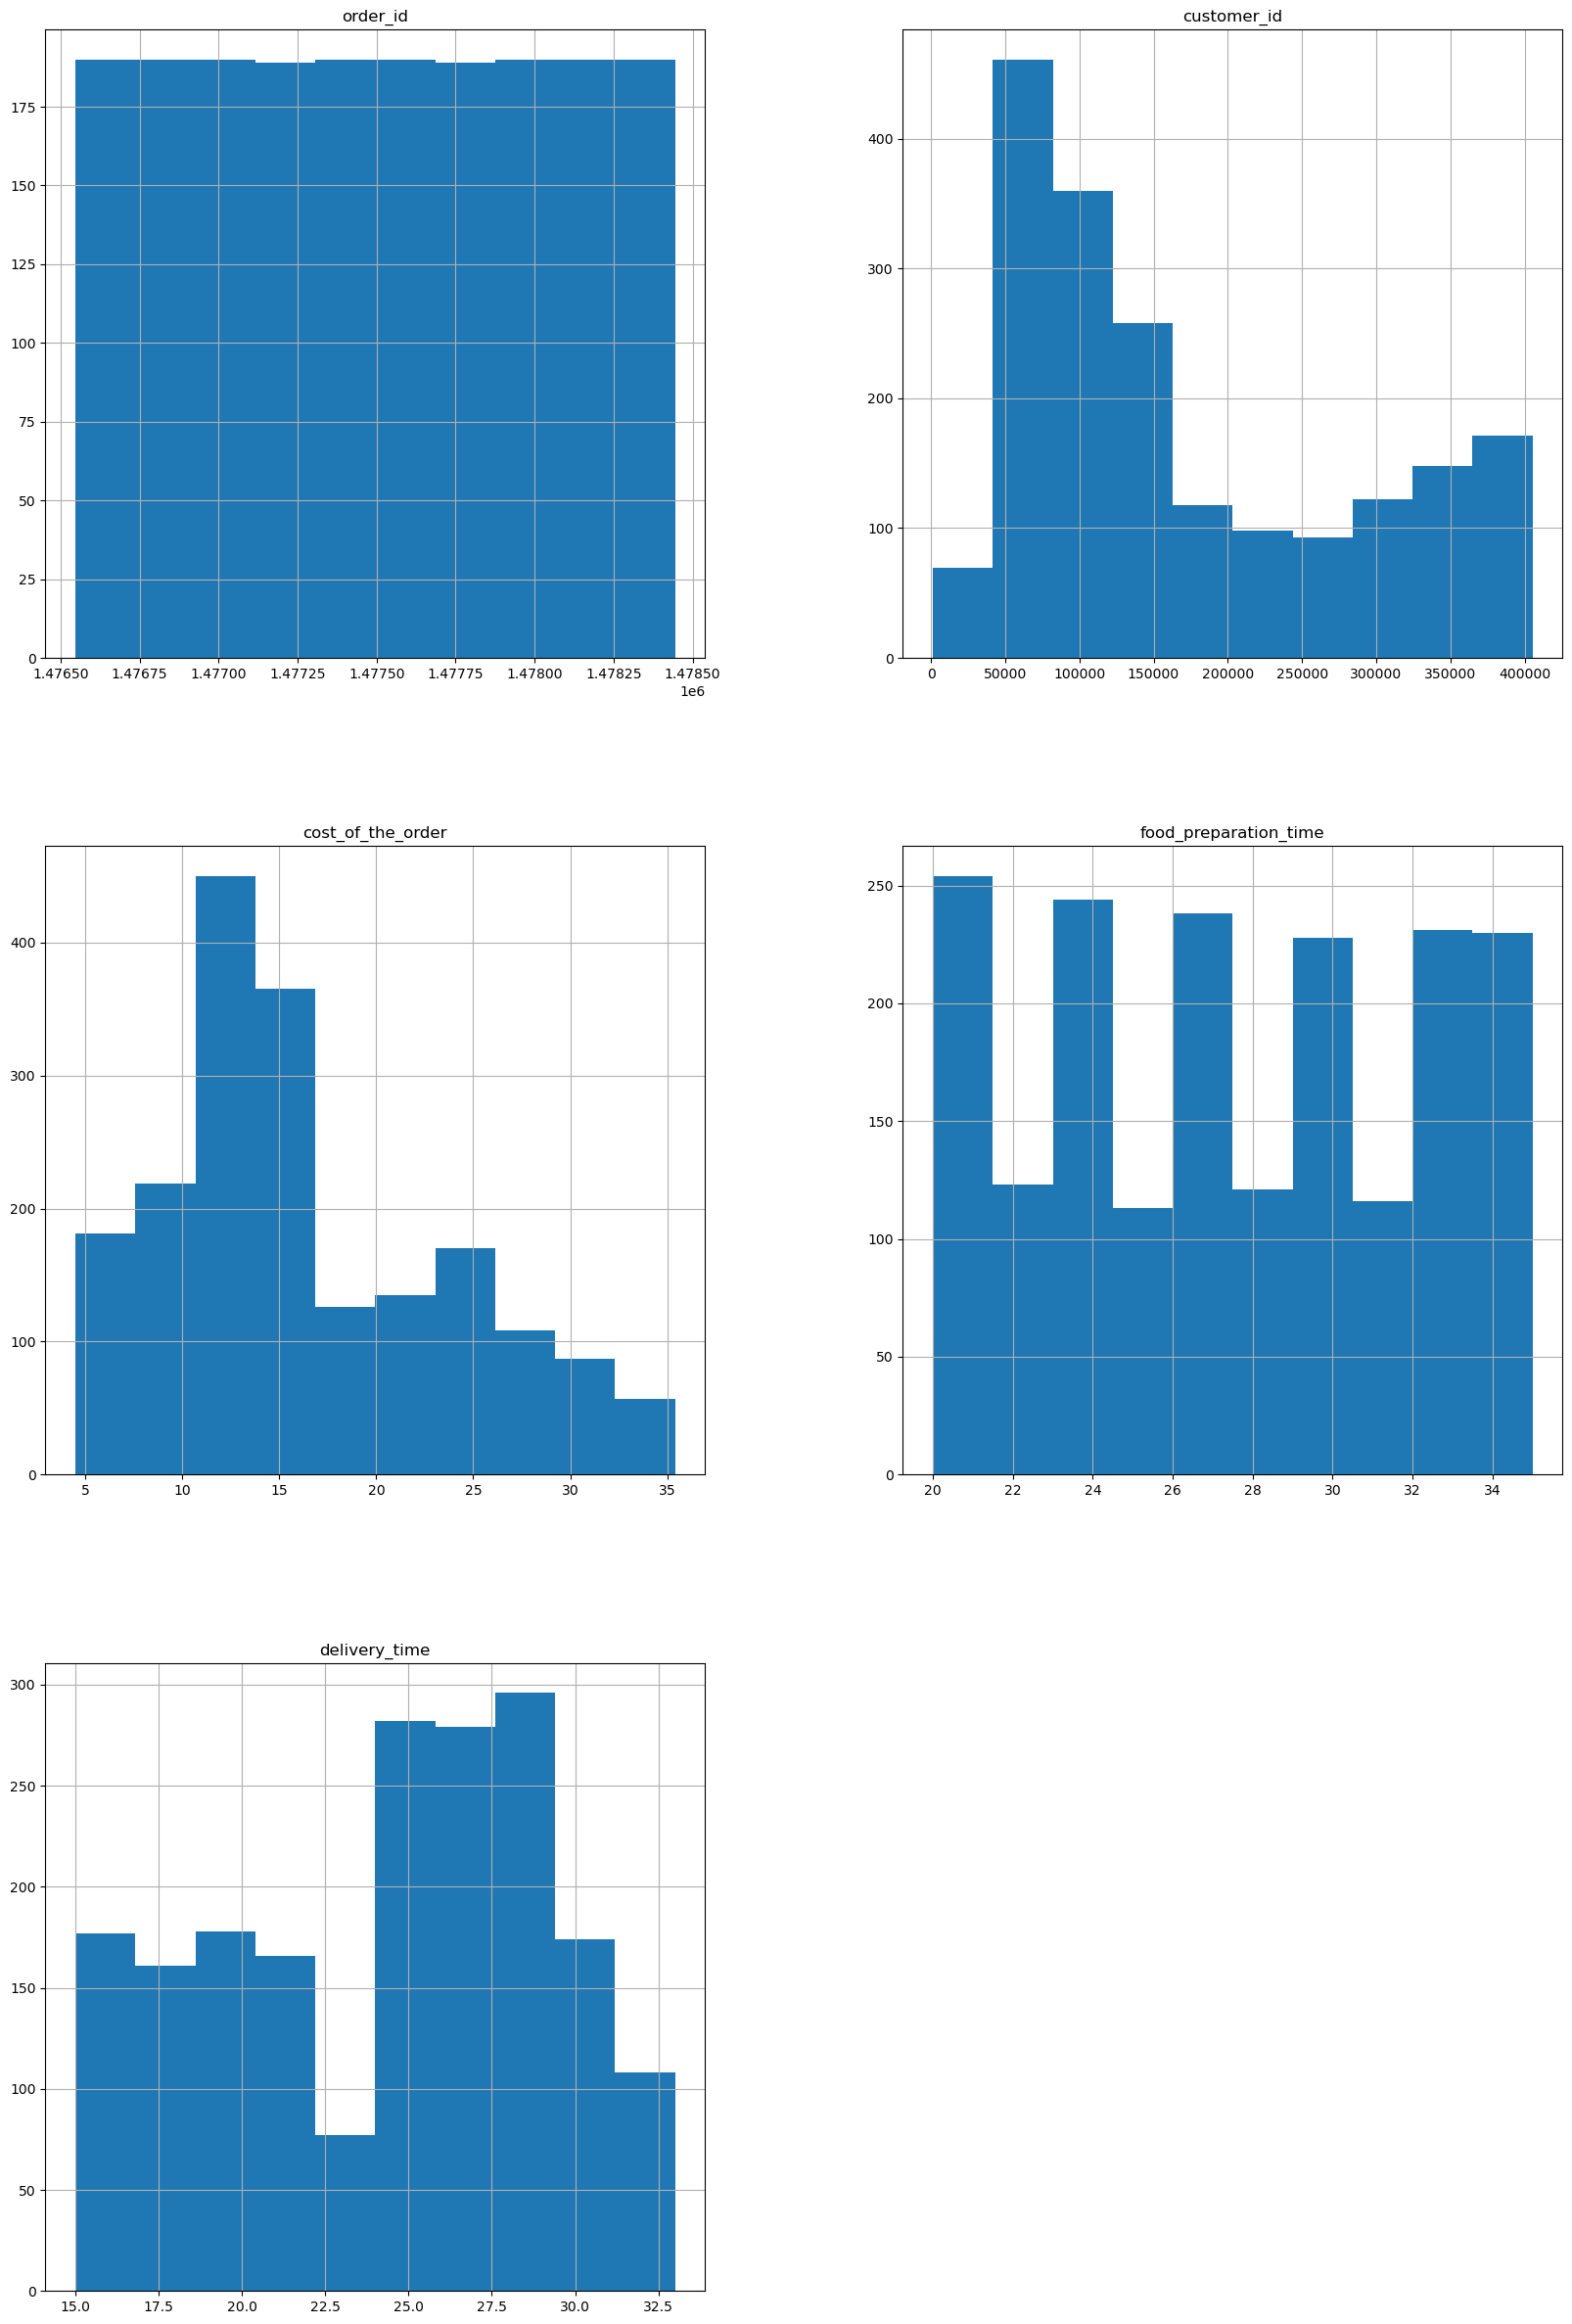

In [10]:
#distribution plot for variables in the DataFrame
df.hist(figsize=(20,30))

#### Observations
From the cost of order distribution we can see that the highest orders cost between approximately 11 and 13 dollars. Most of orders are delievered between approximately 28 and 29 minutes. Most of the orders are prepared between approximately 20 and 21.5 minutes.

Text(0, 0.5, 'Frequency')

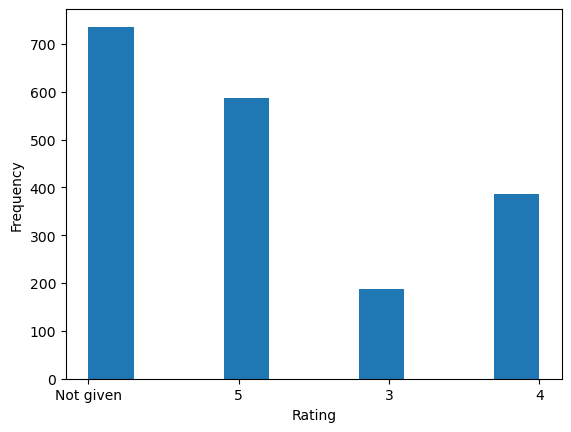

In [11]:
# histogram plot for rating
plt.hist(df['rating'])
plt.xlabel("Rating") # x-axis label
plt.ylabel("Frequency") # y-axis label

#### Observations
We can see that most of the orders are rated '5'

array([<Axes: title={'center': 'Weekday'}>,
       <Axes: title={'center': 'Weekend'}>], dtype=object)

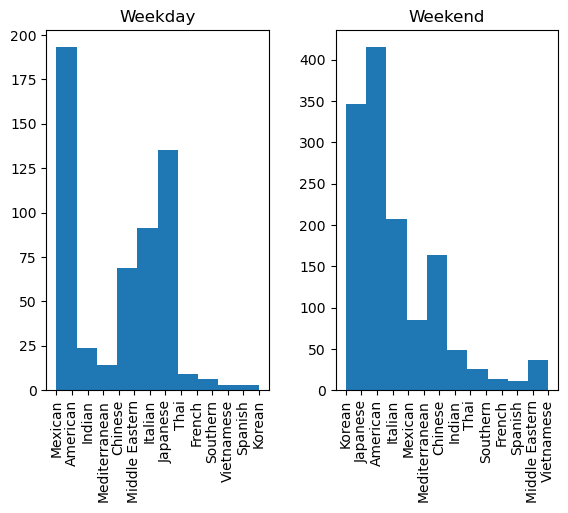

In [12]:
#viewing distribution of number of orders by day of the week and cuisine type
df.hist(by='day_of_the_week',column = 'cuisine_type')

#### Observations
The most popular cuisine on weekdays and weekends is American cuisine.

(array([1]), [Text(1, 0, '1')])

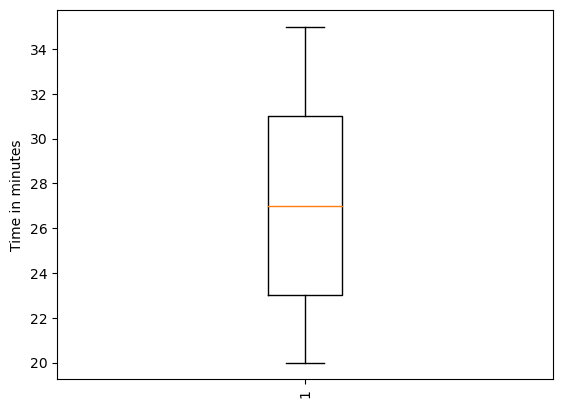

In [13]:
#boxplot of food preparation time
plt.boxplot(data=df, x='food_preparation_time')
plt.ylabel('Time in minutes')
plt.xticks(rotation=90)

#### Observations
The boxplot of food preparation time is symmetrical with a median of 27 minutes

<Axes: xlabel='cost_of_the_order', ylabel='Count'>

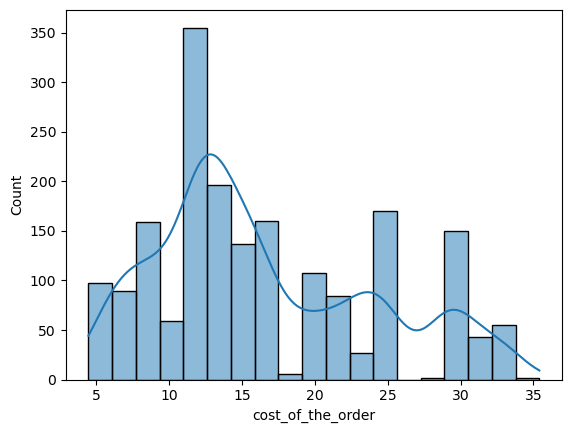

In [14]:
#order cost
sns.histplot(df['cost_of_the_order'],kde=True)

#### Observations
The cost of the order is right skewed. Most of the orders cost approximately between 10 and 15 dollars. This indicates that there are a few orders with a cost significantly higher than the mode.

<Axes: xlabel='delivery_time', ylabel='Density'>

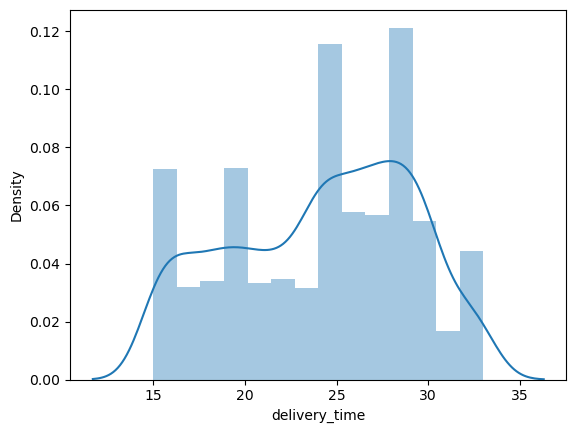

In [15]:
#delivery_time plot
sns.distplot(df['delivery_time'])

#### Observations
The delivery time plot shows a multimodal distribution with peaks at 20, 25 and 29 minutes which could be due to factors like time of order, traffic.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [16]:
# top 5 restaurants
""" First we'll group the data by restaurant name using the groupby() function,
then we'll count the number of orders for each restaurant using the 
count() method and then sort the counts in descending order and 
finally get the first five restaurants with highest number of orders. """

top_5_restaurants=df.groupby(['restaurant_name'])['order_id'].count().sort_values(ascending=False)
top_5_restaurants[0:5]


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64

#### Observations:
From the above output the first five restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi,Blue Ribbon Fried Chicken and Parm with number of orders 219,132,119,96 and 68 respectively.

### **Question 8**: Which is the most popular cuisine on weekends?

In [17]:
# most popular cuisine
''' First we'll filter the DataFrame for day of week
with value 'Weekend', then group them by cuisine type and
count the number of orders using order id. 
Finally sort the cuisines from most popular to least popular and extract the first value.'''

weekend=df[df['day_of_the_week']=='Weekend']
weekend_cuisine=weekend.groupby(['cuisine_type'])['order_id'].count().sort_values(ascending=False)
most_pop_cuisine_weekend=weekend_cuisine[:1]
most_pop_cuisine_weekend

cuisine_type
American    415
Name: order_id, dtype: int64

#### Observations:
  
From output above the most popular cuisine on weekends is American cuisine with a total of 415 orders

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [18]:
# extracting orders that cost more than 20 $
cost_more_20=df[df['cost_of_the_order']>20]['order_id'].count()
#computing their percentage
total_orders=len(df)
percentage_cost_more_20=(cost_more_20/total_orders) * 100
percentage_cost_more_20

29.24130663856691

#### Observations:
From the above output, 29.24% of orders cost more than 20 dollars

### **Question 10**: What is the mean order delivery time?

In [19]:
# mean delivery time
average_delivery_time=df['delivery_time'].mean()
average_delivery_time

24.161749209694417

#### Observations:
The mean order delivery time is approximately 24.2 minutes. With a standard deviation of 5 minutes we can say that 95% of deliveries are between 14 minutes and 34 minutes if the delivery time is normally distributed

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [20]:
# top 3 most frequent customers
customers=df.groupby(['customer_id'])['order_id'].count().sort_values(ascending=False)
top_3_customers=customers[0:3]
top_3_customers

customer_id
52832    13
47440    10
83287     9
Name: order_id, dtype: int64

#### Observations:
The customers with id 52832, 47440 and 83287 will get a 20% discount vouchers

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

In [21]:
#converting order_id and customer_id as integer values
df['order_id']=df['order_id'].astype(int)
df['customer_id']=df['customer_id'].astype(int)

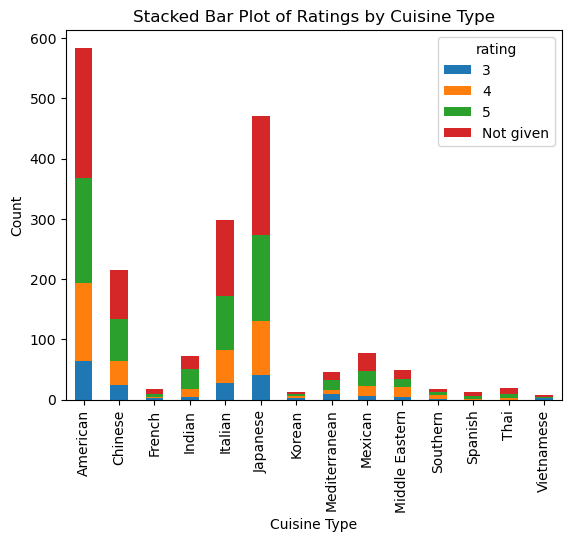

In [22]:
#relationship between cuisine type and rating
crosstab = pd.crosstab(df['cuisine_type'], df['rating'])
# plot of a stacked bar chart
crosstab.plot(kind='bar', stacked=True)
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Ratings by Cuisine Type')
plt.show()

#### Observations
American and Indian cuisines appear to have received the highest number of ratings. The Not given category is relatively small for all cuisines. The proportion of rating 5 is also noticeable

<Axes: xlabel='rating', ylabel='delivery_time'>

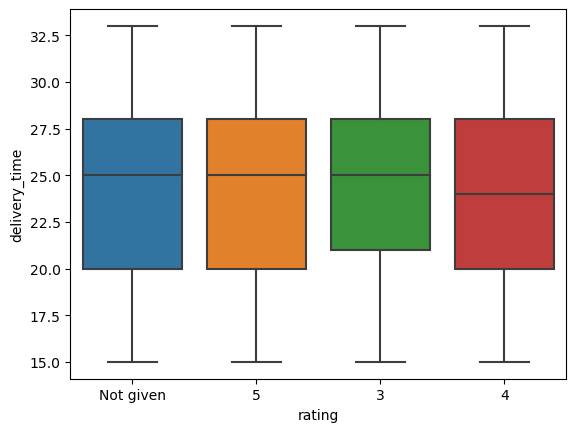

In [23]:
#boxplots of rating and delivery time
sns.boxplot(data=df, x='rating', y='delivery_time')

#### Observations 
The interquartile ranges are similar across all rating categories. Faster delivery correlates with rating '5'.

<Axes: >

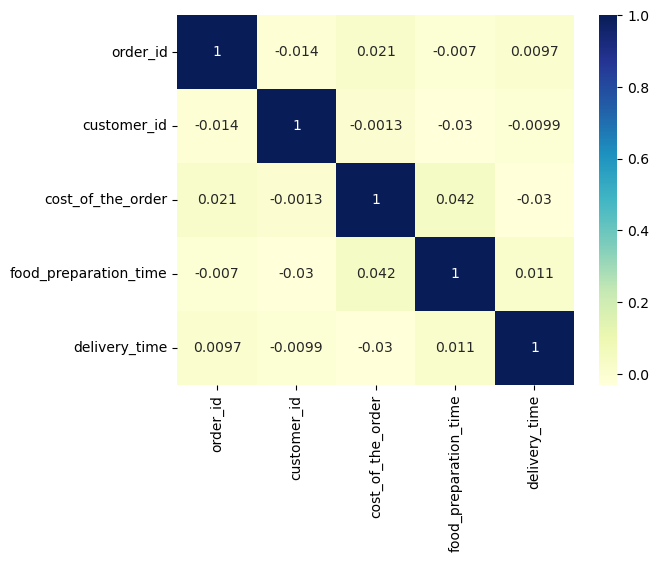

In [24]:
# heatmap
sns.heatmap(data=df.corr(),cmap='YlGnBu', annot=True)

#### Observations 
There is relatively weak correlation among the different variables showing that there is no obvious relationship between the different variables.

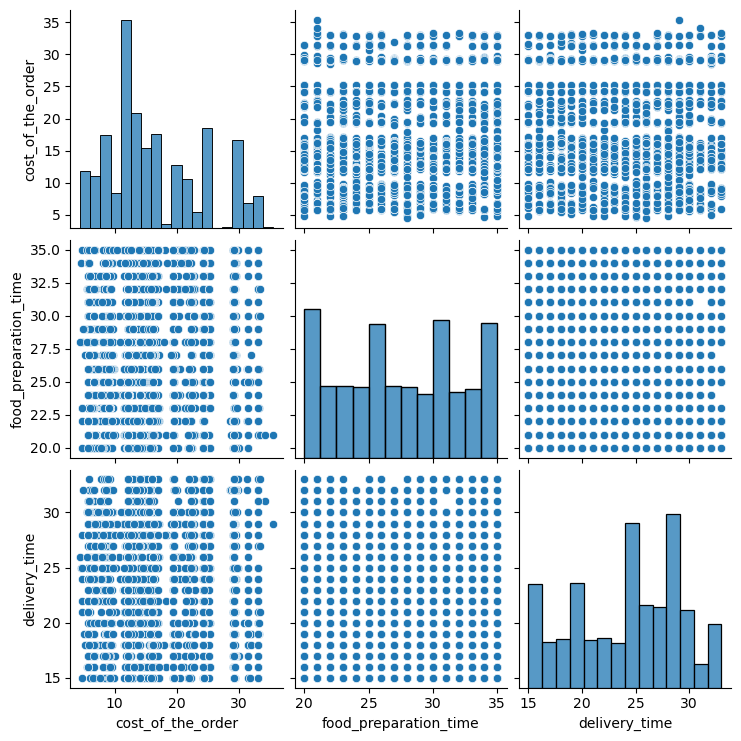

In [25]:
#pair plot
sns.pairplot(data=df[['cost_of_the_order','food_preparation_time','delivery_time']])

#### Observations
The histogram plot of cost of the order is left skewed meaning that there are more lower cost orders than higher cost ones. The food preparation time histogram has a multimodal distribution showing that there are common time periods for food preparation. The delivery time also has a multimodal distribution with most delivery times clustered around intervals. The scatter plots indicate that there is no positive or negative linear correlation between the different variables.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [26]:
# Restaurants with more than 50 rating count and average rating greater than 4
restaurant_ratings = df.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False)
#checking if ratings satisfy both conditions
rating_more_than_50=restaurant_ratings.loc[(restaurant_ratings > 50) & (restaurant_ratings.mean() > 4)]
rating_more_than_50

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
RedFarm Broadway              59
RedFarm Hudson                55
Name: rating, dtype: int64

#### Observations:
Fmom the above output there are 7 restaurants fulfilling this criteria : Shake Shack, The Meatball Shop, Blue Ribbon Sushi,
Blue Ribbon Fried Chicken, Parm, RedFarm Broadway and RedFarm Hudson.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [27]:
#revenue calculation function
def revenue(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

In [28]:
#applying revenue function to DataFrame
df['revenue']= df['cost_of_the_order'].apply(revenue)

In [29]:
#viewing if column revenue is inserted well
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


#### Observations:
The minimum revenue is 0 and maximum revenue is 8.85 dollars. The average revenue is approximately 3.25 dollars. 
The revenue is also right skewed since the mean(3.24 dollars) is greater than the median(2.12 dollars) thus most of the revenue are on the lower end.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [30]:
#total delivery time claculation
df['total_time']=df['food_preparation_time'] + df['delivery_time']
#checking and counting delivery times greater than 60 minutes
time_more_than_60= (df[df['total_time'] > 60]).shape[0]
percentage_time_more_than_60=(time_more_than_60/len(df)) * 100
percentage_time_more_than_60

10.537407797681771

#### Observations:
From the output, the proportion of orders that took more than 60 minutes to be delivered is 10.54 %.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [31]:
# grouping day of the week into weekday and weekend then calculating mean for delivery time for each group
weeks=df.groupby('day_of_the_week')['delivery_time'].mean()
weeks

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

## Observations:
The mean delivery time on weekdays is 28.34 minutes which is higher than that on weekends (22.47 minutes) so there maybe  higher orders on weekdays than on weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
* American cuisine stands as the most popular cuisine which can influence demand and customer satisfaction.
* The longer delivery times on weekdays can be due to traffic, higher volume of orders or fewer availability of delivery personnel.

### Recommendations:

*  FoodHub can promote popular cuisines in order to drive more orders.
*  Implement regular checks to ensure customer ratings in order to measure customer satisfaction and improve quality of service. High ratings can be rewarded with discounts also.
* Given that the delivery time on weekdays is longer than on weekends, operations can be streamlined during weekdays by increasing the number of delivery personnel during peak times.
* The issue of orders taking more than 60 minutes to be delivered has to be adressed. A check has to be done to whether this is due to food preparation or delivery processes and develop strategies to reduce this time.

---